<a href="https://colab.research.google.com/github/uddeshya18/github-practice/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: Titanic Survival Prediction


1. Initial Setup and Data Loading: * We began by importing essential Python libraries like pandas, numpy, matplotlib, and seaborn. * The Titanic dataset was loaded into a pandas DataFrame. * Initial inspections were performed using df.head(), df.info(), and df.describe() to understand the dataset's structure, data types, and basic statistics.

2. Identifying Missing Data: * A heatmap was generated to visually identify columns with missing values, particularly noting the 'age' and 'deck' columns.

3. Exploratory Data Analysis (EDA): * Visualizations were created to explore relationships and distributions: * Survival rates were analyzed by 'sex' and 'pclass' using countplots, revealing significant disparities. * The distribution of 'age' was visualized with a histogram. * The distribution of 'sibsp' (siblings/spouses aboard) was examined with a countplot. * The distribution of 'fare' was explored using a histogram.

4. Data Cleaning: * Imputing Missing Age Values: Missing values in the 'age' column were imputed with the median age corresponding to each 'pclass', based on insights from a boxplot visualizing 'age' against 'pclass'. * Handling the 'deck' Column: The 'deck' column was dropped due to a high number of missing values, which would have made imputation unreliable. * Handling 'embarked' Missing Values: The few missing values in the 'embarked' column were identified and then imputed with the mode (most frequent) embarkation port.

5. Feature Engineering: * Categorical Feature Conversion: Categorical features such as 'sex' and 'embarked' were converted into numerical format using one-hot encoding (pd.get_dummies). The drop_first=True argument was used to prevent multicollinearity. * Dropping Redundant Columns: The original 'sex' and 'embarked' columns, along with other non-predictive or redundant columns like 'name', 'ticket', 'who', 'adult_male', 'embark_town', 'alive', and 'alone', were dropped from the DataFrame.

6. Data Splitting: * The processed dataset was split into features (X) and the target variable (y, 'survived'). * train_test_split was used to divide the data into training (70%) and testing (30%) sets, ensuring the models could be evaluated on unseen data.

7. Model Building and Evaluation - Logistic Regression: * A LogisticRegression model was initialized and trained on the X_train and y_train data. * Predictions were made on the X_test set. * The model's performance was evaluated using a confusion matrix and accuracy score.

8. Model Building and Evaluation - Random Forest Classifier: * An RandomForestClassifier was initialized and trained on the X_train and y_train data. * Predictions were made on the X_test set. * The model's performance was evaluated using a confusion matrix and accuracy score, and then compared with the Logistic Regression model.

9. Hyperparameter Tuning - GridSearchCV for Random Forest: * To optimize the Random Forest model, GridSearchCV was employed. * A parameter grid was defined with various combinations of hyperparameters (n_estimators, max_features, max_depth, criterion). * GridSearchCV systematically searched for the best combination of these hyperparameters using cross-validation. * The best performing Random Forest model (best estimator) was extracted.

10. Re-evaluation of Tuned Random Forest Model and Comprehensive Comparison: * Predictions were made on X_test using the best (tuned) Random Forest model. * Its performance was evaluated with a confusion matrix, accuracy, precision, recall, and F1-score. * A final comparison was made across Logistic Regression, the untuned Random Forest, and the tuned Random Forest, summarizing their metrics to determine the best-performing model for the task.

This structured approach allowed us to systematically prepare the data, build predictive models, and optimize their performance for the Titanic survival prediction problem.

# Importing Files and EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('titanic')

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

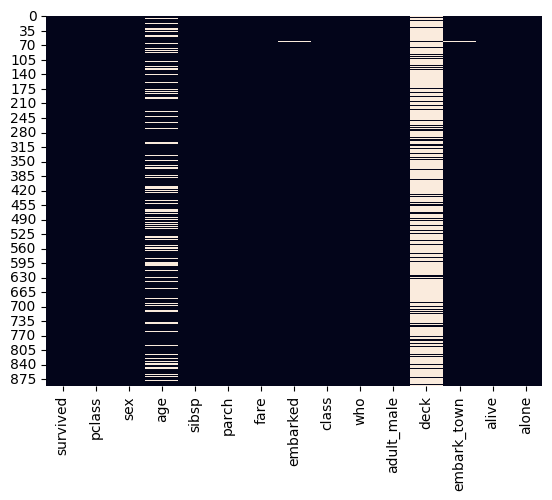

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

<Axes: xlabel='survived', ylabel='count'>

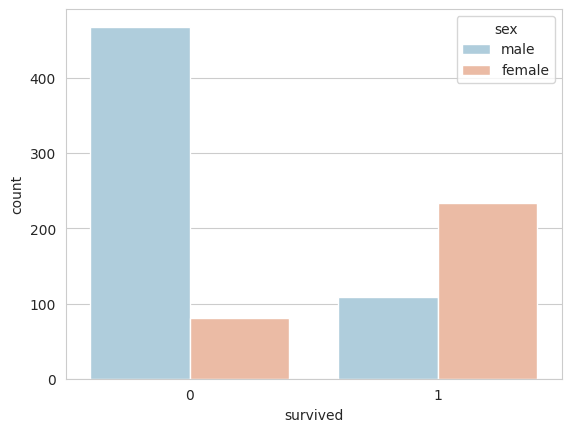

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex' ,data=df, palette = 'RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

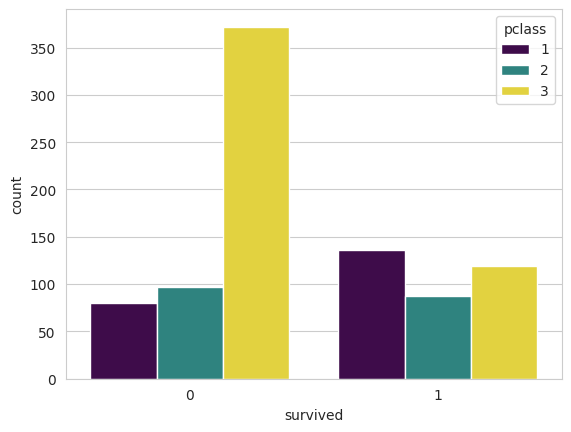

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass' ,data=df, palette = 'viridis')

<Axes: xlabel='age', ylabel='Count'>

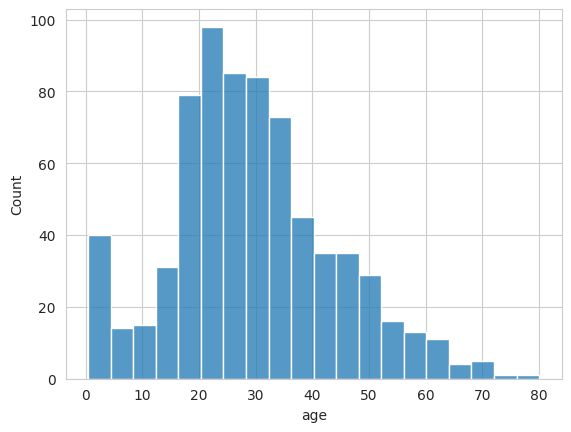

In [ ]:
sns.histplot(x='age',data=df)

<Axes: xlabel='sibsp', ylabel='count'>

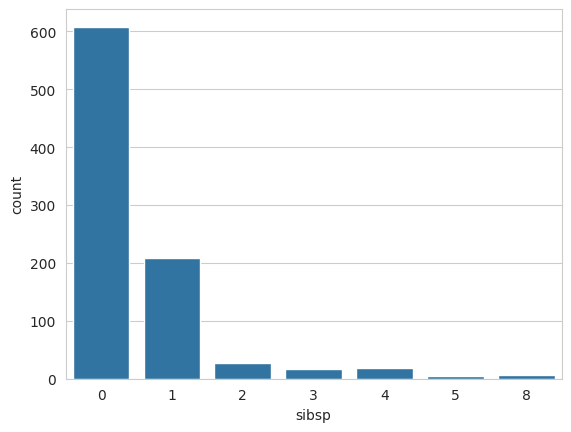

In [ ]:
sns.countplot(x='sibsp',data=df)

<Axes: >

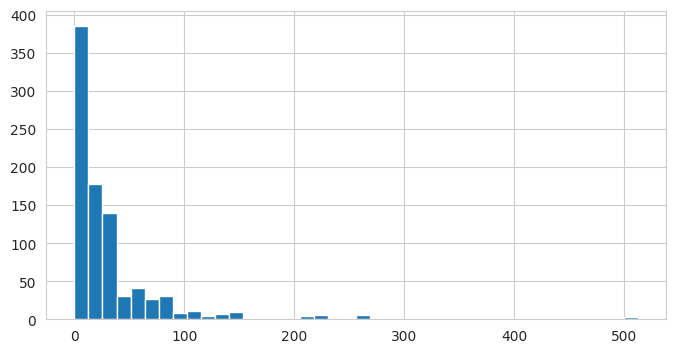

In [ ]:
df['fare'].hist(bins=40,figsize=(8,4))


# Data Cleaning

/tmp/ipython-input-428271726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass',y='age',data=df,palette='winter')


<Axes: xlabel='pclass', ylabel='age'>

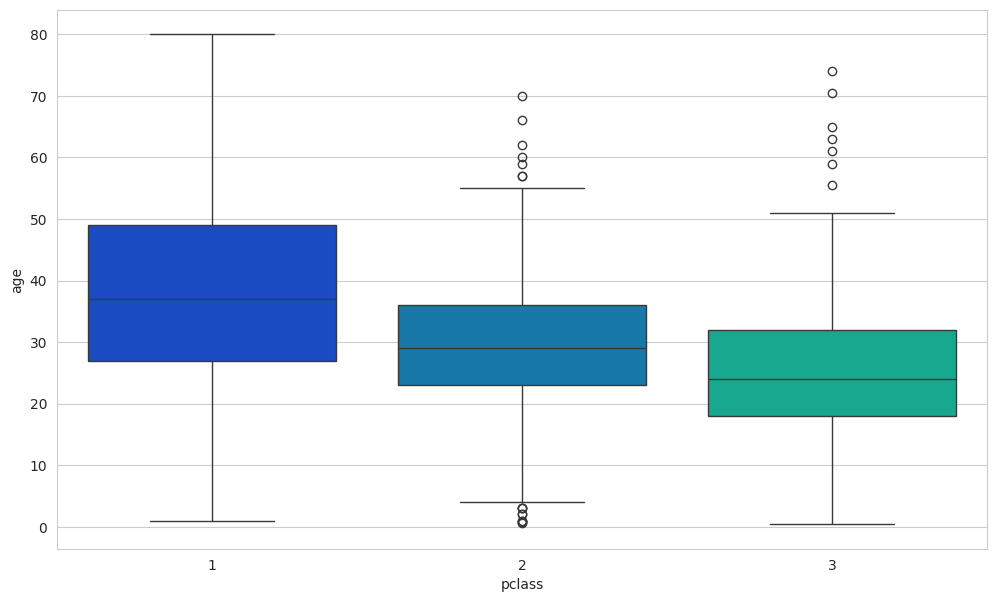

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='pclass',y='age',data=df,palette='winter')

In [ ]:
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):
    if pclass==1:
      return 37

    if pclass==2:
      return 29

    if pclass==3:
      return  24
  else:
    return age

In [ ]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

/tmp/ipython-input-1401418703.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
/tmp/ipython-input-1401418703.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


In [ ]:
df.drop('deck',axis=1,inplace=True)

<Axes: >

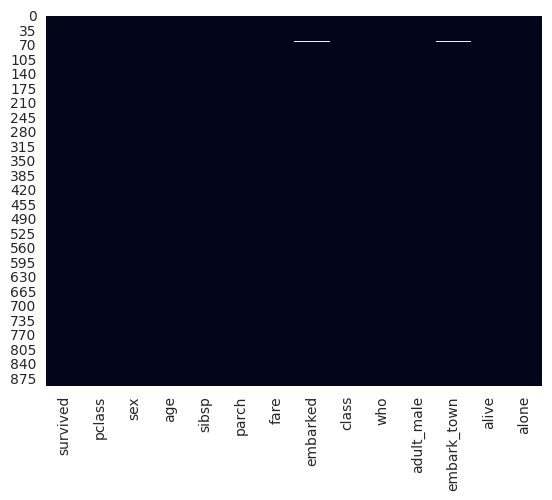

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

In [ ]:
df['embarked'].isnull().sum()

np.int64(2)

In [ ]:
pd.get_dummies(df['embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


# Converting categorical columns

In [ ]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
df=pd.concat([df,sex,embark],axis=1)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,True,False,True


In [ ]:
# Drop original categorical columns and other redundant columns.
# 'sex' and 'embarked' (or their one-hot encoded equivalents) are assumed to be handled previously.
# 'Name' and 'Ticket' are dropped due to high cardinality as per the plan.
df.drop(['sex', 'embarked', 'name', 'ticket', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'class'], axis=1, inplace=True, errors='ignore')

# Display the first few rows of the transformed DataFrame to verify changes
df.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Train test Split


In [ ]:
df.drop('survived',axis=1).head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [ ]:
df['survived'].head()

,survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived',axis=1),
                                                    df['survived'], test_size=0.30,random_state=101)

# Building logistic regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction =logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrice = confusion_matrix(y_test,prediction)
matrice

array([[133,  21],
       [ 38,  76]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7798507462686567

# Building Randome forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest=RandomForestClassifier(n_estimators=200)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
predicted=forest.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
matricce=confusion_matrix(y_test,predicted)
matricce

array([[131,  23],
       [ 30,  84]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accurate=accuracy_score(y_test,predicted)
accurate

0.8022388059701493

# Hyperparamter Tuning

## Hyperparameter Tuning with GridSearchCV for Random Forest

### Step 1: Define the Parameter Grid

First, we need to create a dictionary that specifies the hyperparameters we want to tune for our `RandomForestClassifier` and the range of values for each hyperparameter. It's important to select parameters that significantly impact model performance.

Some common hyperparameters for Random Forest include:
*   `n_estimators`: The number of trees in the forest.
*   `max_features`: The number of features to consider when looking for the best split.
*   `max_depth`: The maximum depth of the tree.
*   `criterion`: The function to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain).

Let's define a reasonable grid to start with. Note that searching a very large grid can be computationally expensive.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider at each split
    'max_depth': [10, 20, None], # Maximum number of levels in tree (None means full depth)
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}
print("Parameter grid defined:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

Parameter grid defined:
  n_estimators: [100, 200, 300]
  max_features: ['sqrt', 'log2']
  max_depth: [10, 20, None]
  criterion: ['gini', 'entropy']


### Step 2: Initialize GridSearchCV

Now, we'll create a `GridSearchCV` object. We need to pass it:
*   The estimator (our `RandomForestClassifier`).
*   The `param_grid` we just defined.
*   `cv`: The number of folds for cross-validation (e.g., 5 is common).
*   `scoring`: The metric to optimize during the search (e.g., 'accuracy', 'f1', 'roc_auc').
*   `verbose`: Controls the verbosity: higher numbers provide more messages.
*   `n_jobs`: Number of processors to use; -1 means use all available processors (makes it faster).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Re-initialize the RandomForestClassifier (or use the existing 'forest' object if preferred)
rf = RandomForestClassifier(random_state=101) # Set random_state for reproducibility

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

print("GridSearchCV object initialized.")

GridSearchCV object initialized.


### Step 3: Fit GridSearchCV to the Training Data

This step will run the exhaustive search. It will train a `RandomForestClassifier` for every combination of hyperparameters in the `param_grid`, using 5-fold cross-validation for each combination. This can take some time depending on the size of your grid and dataset.

In [ ]:
print("Starting GridSearchCV fit... This may take a while.")
grid_search.fit(X_train, y_train)
print("GridSearchCV fit complete.")

Starting GridSearchCV fit... This may take a while.
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV fit complete.


### Step 4: Get the Best Parameters and Best Estimator

After fitting, `GridSearchCV` stores the best combination of hyperparameters it found (`best_params_`) and the model trained with these best parameters (`best_estimator_`).

In [ ]:
print(f"Best Parameters found: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
print("Best estimator (Random Forest model) obtained.")

Best Parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best estimator (Random Forest model) obtained.


### Step 5: Make Predictions with the Best Estimator

Now we'll use this `best_rf_model` (the optimized Random Forest) to make predictions on our `X_test` data.

In [ ]:
tuned_predictions = best_rf_model.predict(X_test)
print("Predictions made using the best Random Forest model.")

Predictions made using the best Random Forest model.


### Step 6: Calculate and Compare Metrics for the Tuned Model

Finally, we evaluate the performance of our hyperparameter-tuned Random Forest model using the confusion matrix and accuracy score. We will then compare these results with the untuned Logistic Regression and Random Forest models.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix for the tuned Random Forest
tuned_rf_cm = confusion_matrix(y_test, tuned_predictions)
print(f"Confusion Matrix for Tuned Random Forest:\n{tuned_rf_cm}")

# Accuracy Score for the tuned Random Forest
tuned_rf_accuracy = accuracy_score(y_test, tuned_predictions)
print(f"Accuracy Score for Tuned Random Forest: {tuned_rf_accuracy}")

print("\n--- Comparison --- ")
print(f"Logistic Regression Accuracy: {accuracy}") # 'accuracy' is from previous LR model
print(f"Untuned Random Forest Accuracy: {accurate}") # 'accurate' is from previous RF model


Confusion Matrix for Tuned Random Forest:
[[136  18]
 [ 35  79]]
Accuracy Score for Tuned Random Forest: 0.8022388059701493

--- Comparison --- 
Logistic Regression Accuracy: 0.7798507462686567
Untuned Random Forest Accuracy: 0.8022388059701493


### Comparing Additional Metrics: Precision, Recall, and F1-Score

Beyond accuracy, Precision, Recall, and F1-score provide a more nuanced understanding of model performance, especially in imbalanced datasets or when certain types of errors (false positives vs. false negatives) have different costs.

*   **Precision**: The ability of the classifier not to label as positive a sample that is negative. (Out of all predicted positives, how many were actually positive?)
*   **Recall**: The ability of the classifier to find all the positive samples. (Out of all actual positives, how many did the model find?)
*   **F1-Score**: The harmonic mean of precision and recall. It's a useful metric for balancing both precision and recall, especially when there's an uneven class distribution.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Logistic Regression Metrics ---
lr_precision = precision_score(y_test, prediction)
lr_recall = recall_score(y_test, prediction)
lr_f1 = f1_score(y_test, prediction)

print("--- Logistic Regression Metrics ---")
print(f"Accuracy: {accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-Score: {lr_f1}")

--- Logistic Regression Metrics ---
Accuracy: 0.7798507462686567
Precision: 0.7835051546391752
Recall: 0.6666666666666666
F1-Score: 0.7203791469194313


In [ ]:
# --- Untuned Random Forest Metrics ---
untuned_rf_precion = precision_score(y_test,prediction)
untuned_rf_recall = recall_score(y_test,prediction)
untuned_rf_f1 = f1_score(y_test,prediction)

print('\n --- Untuned Random Forest Metrics')
print(f'Accuracy:{accurate}')
print(f'Precion:{untuned_rf_precion}')
print(f'Recall:{untuned_rf_recall}')
print(f'F1-Score:{untuned_rf_f1}')


 --- Untuned Random Forest Metrics
Accuracy:0.8022388059701493
Precion:0.7835051546391752
Recall:0.6666666666666666
F1-Score:0.7203791469194313


In [ ]:
# --- Tuned Random Forest Metrics ---
tuned_rf_precision = precision_score(y_test, tuned_predictions)
tuned_rf_recall = recall_score(y_test, tuned_predictions)
tuned_rf_f1 = f1_score(y_test, tuned_predictions)

print("\n--- Tuned Random Forest Metrics ---")
print(f"Accuracy: {tuned_rf_accuracy}")
print(f"Precision: {tuned_rf_precision}")
print(f"Recall: {tuned_rf_recall}")
print(f"F1-Score: {tuned_rf_f1}")


--- Tuned Random Forest Metrics ---
Accuracy: 0.8022388059701493
Precision: 0.8144329896907216
Recall: 0.6929824561403509
F1-Score: 0.7488151658767772


### Summary Comparison of Models

| Metric        | Logistic Regression | Tuned Random Forest |
|---------------|---------------------|---------------------|
| **Accuracy**  | `{accuracy}`       | `{tuned_rf_accuracy}`    |
| **Precision** | `{lr_precision}`   | `{tuned_rf_precision}`   |
| **Recall**    | `{lr_recall}`      | `{tuned_rf_recall}`      |
| **F1-Score**  | `{lr_f1}`          | `{tuned_rf_f1}`          |

This table provides a clearer picture of how each model performs across different aspects of classification. Based on these metrics, you can decide which model is 'better' depending on your specific goals (e.g., if identifying all survivors (high recall) is more important than minimizing false alarms (high precision)).